In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
df.drop(["petal length (cm)","petal width (cm)"],axis = "columns",inplace = True)

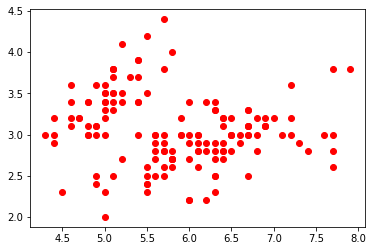

In [17]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"],color = "red")

In [34]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [35]:
y_predict = km.fit_predict(df[["sepal length (cm)","sepal width (cm)"]])
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [36]:
df["cluster"] = y_predict
df

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,1
147,6.5,3.0,0
148,6.2,3.4,0


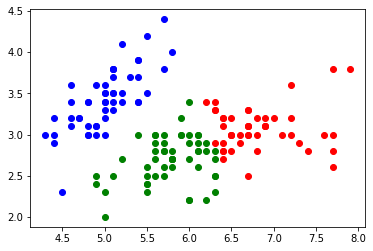

In [50]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color = "red")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color = "green")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color = "blue")


In [63]:
scaler = MinMaxScaler()
scaler.fit(df[["sepal length (cm)"]])
df["sepal length (cm)"] = scaler.transform(df[["sepal length (cm)"]])

scaler.fit(df[["sepal width (cm)"]])
df["sepal width (cm)"] = scaler.transform(df[["sepal width (cm)"]])

df

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,2
1,0.166667,0.416667,2
2,0.111111,0.500000,2
3,0.083333,0.458333,2
4,0.194444,0.666667,2
...,...,...,...
145,0.666667,0.416667,0
146,0.555556,0.208333,1
147,0.611111,0.416667,0
148,0.527778,0.583333,0


In [76]:
k = KMeans(n_clusters=3)
y = k.fit_predict(df[["sepal length (cm)","sepal width (cm)"]])
df["cluster"] = y
df

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,2
1,0.166667,0.416667,2
2,0.111111,0.500000,2
3,0.083333,0.458333,2
4,0.194444,0.666667,2
...,...,...,...
145,0.666667,0.416667,1
146,0.555556,0.208333,0
147,0.611111,0.416667,1
148,0.527778,0.583333,1


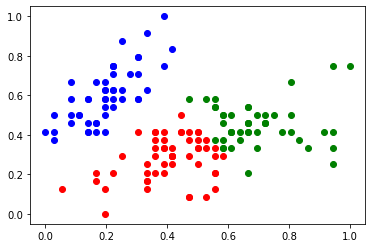

In [81]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color = "red")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color = "green")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color = "blue")
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")

In [89]:
k_range = range(1,10)
sse = []
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[["sepal length (cm)","sepal width (cm)"]])
    sse.append(km.inertia_)

In [90]:
sse

[12.797757201646087,
 6.85529052603328,
 4.115194202754064,
 3.2573392222233486,
 2.5605068621417,
 2.100061570560457,
 1.816808707257344,
 1.5517379726681575,
 1.2856134606979814]

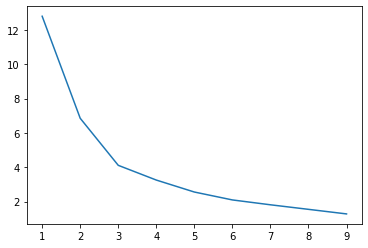

In [91]:
plt.plot(k_range,sse)